### Importing libraries and reading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("wine_clust.csv")

### Preprocessing

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.shape

(178, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Finding null values and hamdling them if present

In [8]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
#no null values are present in this dataset

### Correlation heatmap

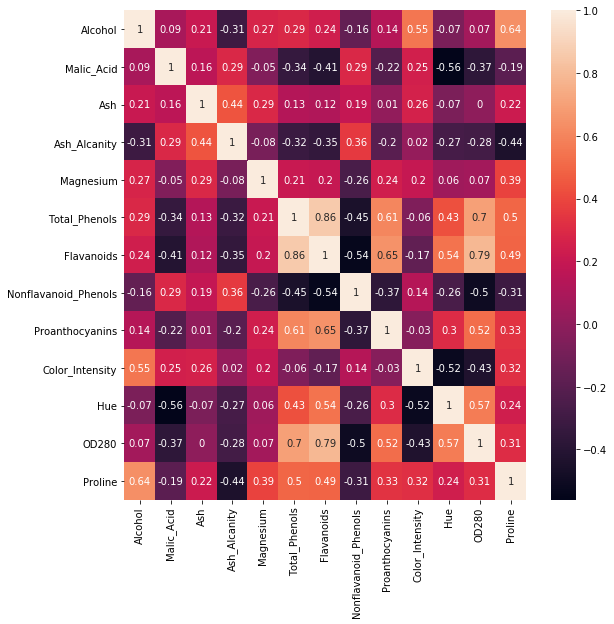

In [9]:
correlation = df.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2),annot = True)
plt.show()

### Standardisation

In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(df)
X_scaled_array = scaler.transform(df)
wine_norm = pd.DataFrame(X_scaled_array, columns = df.columns)
#this standardised wine_norm dataset is used for clustering to so that attributes has common scale  
wine_norm.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### KMeans Clustering

In [11]:
from sklearn.cluster import KMeans
# Calculating WCSS (within-cluster sums of squares) 
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(wine_norm)
    wcss.append(kmeans.inertia_)

C:\Users\farsana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


### Elbow plot(kmeans)

Text(0, 0.5, 'WCSS')

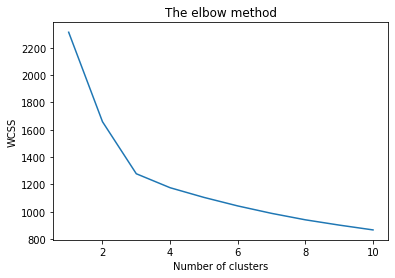

In [12]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#### From the figure above, we can see that when the number of cluster is 3,it's hard to predict now whether adding another cluster can improve much better the inertia or not.

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state =42)
y_kmeans = kmeans.fit_predict(wine_norm)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [14]:
#finding with clusters = 4 to check score inorder to ensure inertia can be improved or not
kmeans1 = KMeans(n_clusters = 4, init = 'k-means++', random_state =42)
y_kmeans1 = kmeans1.fit_predict(wine_norm)
y_kmeans1

array([3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### Silhouette Score(kmeans)

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
#for 3 clusters
sil_kmeans_3 =silhouette_score(wine_norm,y_kmeans)
sil_kmeans_3

0.2848589191898987

In [17]:
#for 4 clusters
sil_kmeans_4 =silhouette_score(wine_norm,y_kmeans1)
sil_kmeans_4

0.25173343011696475

##### So its clear Kmeans CLustering with 3 clusters is the optimum option for this dataset since it gives higher silhouette score (0.2848589191898987)

### KMeans with PCA

In [18]:
df1 = pd.read_csv("wine_clust.csv")
#importing standardscaler
from sklearn.preprocessing import StandardScaler
#satndardisation
scaler1 = StandardScaler()
scaled_data1 = scaler.fit_transform(df1)
scaled_data1 = pd.DataFrame(scaled_data1,columns = df1.columns)
scaled_data1

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [20]:
### Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 13)
pca.fit(scaled_data1)

PCA(n_components=13)

In [21]:
x_pca = pca.transform(scaled_data1)
x_pca.shape

(178, 13)

In [23]:
### KMeans on PCA transformed data
#kmeans on pca tranformed data
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(x_pca)
kmeans_labels = kmeans.predict(x_pca)

C:\Users\farsana\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


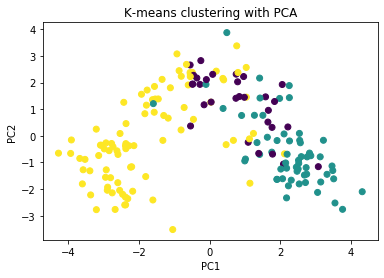

In [24]:
# Visualize clusters
import matplotlib.pyplot as plt
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans_labels)
plt.title('K-means clustering with PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [25]:
###checking silhouette score for kmeans clustering with pca transformed data
#3 clusters
sil_kmeans_pca =silhouette_score(x_pca,kmeans_labels)
sil_kmeans_pca

0.11652519725983372

### Agglomerative Clustering

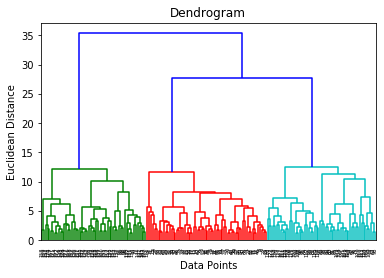

In [32]:
import scipy.cluster.hierarchy as sch
#draw dendrogram
dendrogram = sch.dendrogram(sch.linkage(wine_norm, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

###### can see 3 clusters is correct choice since longest dendrite cuts at 3 points.

In [33]:
from sklearn.cluster import AgglomerativeClustering
ahc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_ahc = ahc.fit_predict(df)
y_ahc

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

### Silhouette Score (AHC)

In [35]:
silhouette_scores = []
for i in range(2, 13):
    ac = AgglomerativeClustering(n_clusters=i)
    y_ac = ac.fit_predict(wine_norm)
    silhouette_scores.append(silhouette_score(wine_norm, y_ac))
silhouette_scores

[0.2670131771272231,
 0.2774439826952265,
 0.225836659334758,
 0.18674235566758707,
 0.17966642854438503,
 0.18685342560226942,
 0.18834697102837825,
 0.1917169293227209,
 0.19856750165505588,
 0.12953310413439506,
 0.13409392850263455]

###### Hence 3 clusters is the optimum cluster option for agglomerative clustering due to its silhouette score (0.2774439826952265).

### AC with PCA

In [37]:
ahc_pca = AgglomerativeClustering(n_clusters=3)
ahc_pca.fit(x_pca)
labels_ac_pca = ahc_pca.fit_predict(x_pca)

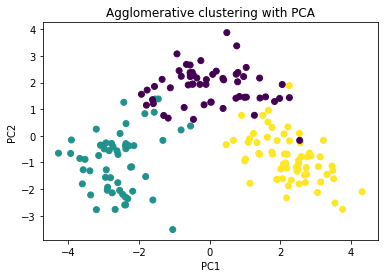

In [38]:
# Visualize clusters
import matplotlib.pyplot as plt
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels_ac_pca)
plt.title('Agglomerative clustering with PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Silhouette score (AHC with PCA)

In [39]:
sil_ac_pca =silhouette_score(x_pca,labels_ac_pca)
sil_ac_pca

0.2774439826952265

##### Score is same for both cases, hence can choose 3 clusters as optimum option in this dataset for Agglomerative clustering (0.2774439826952265).

### DB Scan Clustering

In [41]:
#For the eps parameter, we'll set it to 0.5, and for min_samples, we'll set it to 5. 
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(wine_norm)

In [42]:
#Let's check how many clusters were created:
df['cluster']= dbscan.labels_
print(df['cluster'].value_counts())

-1    178
Name: cluster, dtype: int64


In [44]:
# Performing PCA
X = df.iloc[:, 1:].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

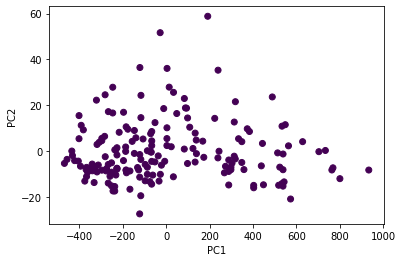

In [45]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_clusters)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

###### gets only one single cluster from this dataset in dbscan clustering

#### Hence so far kmeans cluster with 3 clusters is optimum choice for this dataset.